In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.6.0'

In [3]:
import numpy as np

# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# x의 평균값을 구합니다.
mx = np.mean(x)

# y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값: ", mx)
print("y의 평균값: ", my)

# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모: ", divisor)
print("분자: ", dividend)

# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y 절편 b를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a = ", a)
print("y 절편 b = ", b)

x의 평균값:  5.0
y의 평균값:  90.5
분모:  20.0
분자:  46.0
기울기 a =  2.3
y 절편 b =  79.0


In [4]:
# 평균제곱초파
# 점수 y,x 공부시간
errs= y-(x*a+b) #실제점수 - 예상점수
np.mean(errs**2) #오차제곱평균

8.299999999999985

In [5]:
# 평균제곱오차함수
def mse(y,y_pred): #실제값, 예측값
    errs= y-(x*3+76)
    return np.mean(errs**2)

mse (y, x*a+b)

11.0

In [6]:
np.mean((y-(x*a+b))**2)

8.299999999999985

In [7]:
# 기울기 2.3 평균제곱오차
print("a=1.5", np.mean((y-(x*1.5+79))**2))
print("a=2.3", np.mean((y-(x*2.3+79))**2))
print("a=3.0", np.mean((y-(x*3.0+79))**2))

a=1.5 27.5
a=2.3 8.299999999999985
a=3.0 23.0


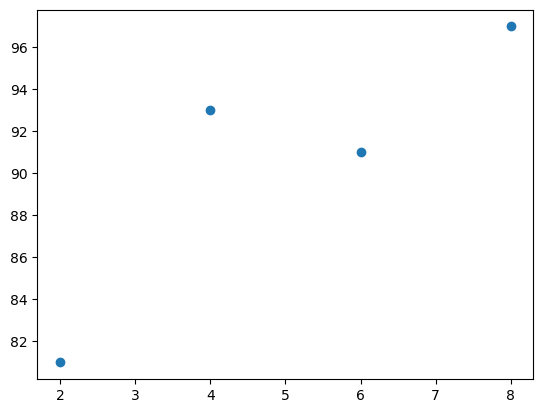

a_diff= -928.0
epoch=0, 기울기=27.8400, 절편=5.4300
a_diff= 796.7
a_diff= -669.838
a_diff= 577.0440799999998
a_diff= -483.21742479999966
a_diff= 418.22067588799973
a_diff= -348.31817705727974
a_diff= 303.37726430967655
a_diff= -250.8110880788748
a_diff= 220.33010421770516
a_diff= -180.33672157193388
a_diff= 160.270806731237
a_diff= -129.4056066211951
a_diff= 116.83123434073421
a_diff= -92.6031479673434
a_diff= 85.40745859947005
a_diff= -66.01480638457728
a_diff= 62.67100724691291
a_diff= -46.81052596124623
a_diff= 46.215514467326116
a_diff= -32.944290833943555
a_diff= 34.30126246473641
a_diff= -22.936916137117365
a_diff= 25.670494736111664
a_diff= -15.719014124397233
a_diff= 19.4138945903904
a_diff= -10.517464650087732
a_diff= 14.874054194096232
a_diff= -6.7733376482000835
a_diff= 11.57568636068089
a_diff= -4.082554209289171
a_diff= 9.175170326392788
a_diff= -2.1529867985264985
a_diff= 7.424075263029138
a_diff= -0.7734443475353032
a_diff= 6.142789162815561
a_diff= 0.20875034216943789
a_diff

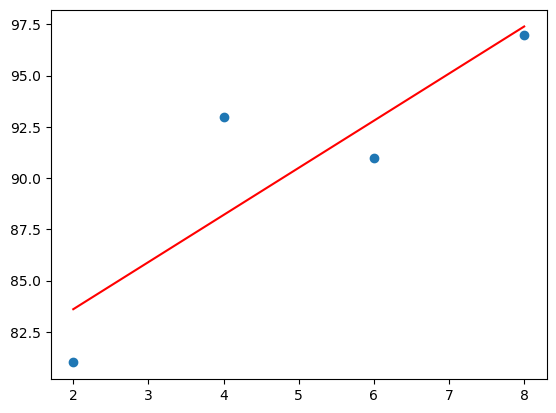

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 X와 성 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다.
epochs = 2001 

# x 값이 총 몇 개인지 셉니다.
n = len(x)

# 경사 하강법을 시작합니다.
for i in range(epochs):      # 에포크 수만큼 반복합니다.
    y_pred = a * x + b       # 예측 값을 구하는 식입니다.
    error = y - y_pred       # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.
    print("a_diff=", a_diff)
    a = a - lr * a_diff   # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff   # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:      # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
y_pred = a * x + b      

# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

In [9]:
# 경사하강법 한줄씩 테스트

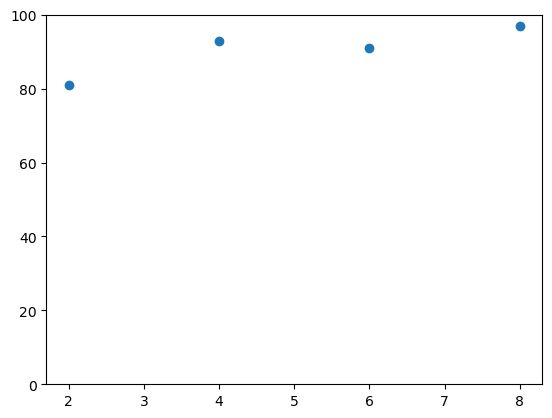

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 X와 성 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.ylim(0,100)
plt.scatter(x, y)
plt.show()

In [11]:
# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a = 0
b = 0

mse= 3664.024387689822
epoch=2000, 기울기=24.0341, 절편=6.2996
a_diff= 577.0440799999998
epoch=2000, 기울기=6.7228, 절편=4.1414


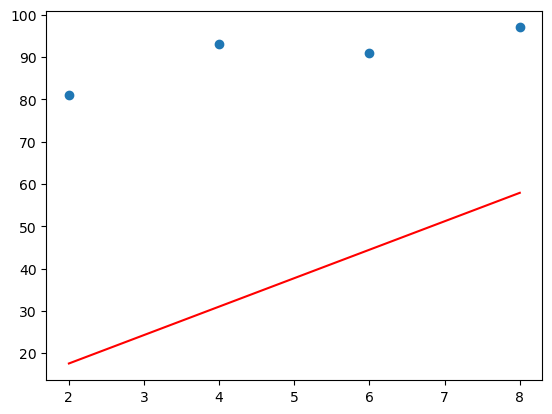

In [15]:
# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다.
epochs = 2001 

# x 값이 총 몇 개인지 셉니다.
n = len(x)

# 경사 하강법을 시작합니다.
      # 에포크 수만큼 반복합니다.
mse = np.mean((y-(a*x+b))**2)
print('mse=',mse)
print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

y_pred = a * x + b       # 예측 값을 구하는 식입니다.
error = y - y_pred       # 실제 값과 비교한 오차를 error로 놓습니다.

a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.
print("a_diff=", a_diff)
a = a - lr * a_diff   # 학습률을 곱해 기존의 a 값을 업데이트합니다.
b = b - lr * b_diff   # 학습률을 곱해 기존의 b 값을 업데이트합니다.

print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
y_pred = a * x + b      

# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()